In [380]:
import numpy as np
data=[]
with open ('applesOranges.csv') as f :

    for i,line in enumerate(f):
        data.append(line.strip().split(","))
#print(data[:9])
data=np.array(data)
x1=data[1:,0].astype(float)# always convert
x2=data[1:,1].astype(float)
y=data[1:,2].astype(float)

In [413]:
num_vectors = 19

# Create equally spaced angles between 0 and 180 degrees
angles = np.linspace(0, 180, num_vectors)

# Initialize a list to store weight vectors
weight_vectors = []
for angle in angles:
   
    angle_rad = np.radians(angle)
    w1 = np.cos(angle_rad)
    w2 = np.sin(angle_rad)
    weight_vectors.append((w1, w2))
weight_vectors=np.array(weight_vectors)
print(weight_vectors.shape)


(19, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


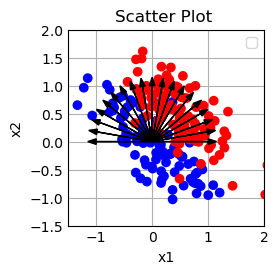

In [414]:
import matplotlib.pyplot as plt


# Assuming you have already defined x1, x2, and y as NumPy arrays.
colors = ['red' if y_val == 1 else 'blue' for y_val in y]

plt.scatter(x1, x2, c=colors)
# Set the x-axis and y-axis limits
plt.xlim(-1.5, 2)
plt.ylim(-1.5, 2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot ')
for w in weight_vectors:
    plt.arrow(0, 0, w[0], w[1], head_width=0.1, color='black')


plt.grid(True)
plt.legend()
plt.show()

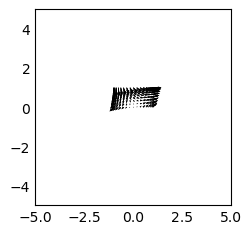

In [356]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data
x = weight_vectors[:,0]
y = weight_vectors[:,1]
X, Y = np.meshgrid(x, y)
U = X+Y
V =  X-Y

# plot
fig, ax = plt.subplots()

ax.quiver(X, Y, U, V )

ax.set(xlim=(-5, 5), ylim=(-5, 5))

plt.show()

In [415]:
print(weight_vectors[0])
print(weight_vectors[0].shape)
print(weight_vectors[0].reshape(1,2))
c=np.column_stack((x1, x2))
print(c.shape)


[1. 0.]
(2,)
[[1. 0.]]
(200, 2)


In [416]:
accuracy = np.zeros(19)
input=np.column_stack((x1, x2))
for i,w in enumerate(weight_vectors):
    y_pred=np.sign(np.dot(input,w.T))
    print(y.shape)
    y_pred[y_pred<0]=0
    accuracy[i]=np.mean(y_pred==y)
print(y_pred.shape)
print(accuracy)

(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
[0.675 0.705 0.76  0.745 0.71  0.735 0.755 0.75  0.725 0.69  0.63  0.6
 0.565 0.52  0.505 0.465 0.42  0.35  0.325]


(0.0, 1.0)

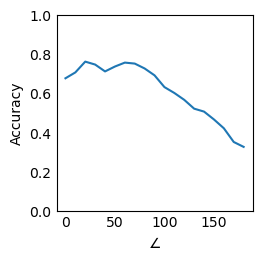

In [417]:
plt.plot(angles, accuracy)
plt.xlabel(r'$\angle$')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

In [418]:
w_accurate=weight_vectors[accuracy==max(accuracy)]
print(w_accurate)
w_accurate=w_accurate.squeeze()

[[0.93969262 0.34202014]]


In [419]:
bais_opt=np.linspace(-3.0,3.0,21)
dot_product = np.dot(input, w_accurate.T)
y_predi = np.array([np.sign(dot_product - b) for b in bais_opt])
y_predi[y_predi<0]=0
#y_predi=y_predi.squeeze()#to remove Broadcasting
accuracy=np.array([np.mean(y_predi[i]==y) for i in range(y_predi.shape[0])])
print(accuracy)
#print(bais_opt)
#print(y)

[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.505 0.52  0.61  0.76  0.785
 0.73  0.62  0.53  0.51  0.5   0.5   0.5   0.5   0.5  ]


(-3.0, 3.0)

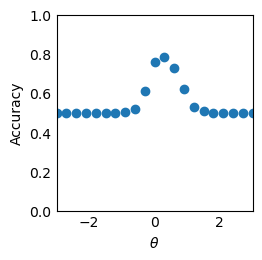

In [420]:
plt.plot(bais_opt, accuracy, 'o')
plt.xlabel(r'$\theta$')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlim(-3,3)

In [421]:
a=np.array([[1,12,1],[1,12,6]])

b=np.array([[1],[0],[0]])
print(a.shape)
print(b.shape)
c=np.dot(a,b)
print(c.shape)
d=np.count_nonzero(a[1]==b)

print(d)

(2, 3)
(3, 1)
(2, 1)
1


In [ ]:
a=np.array([[1,12,1],[1,8,6]])
c=a[[1,12,1]==a]
print(c)

[ 1 12  1  1]


In [431]:
acc_mat=[]
bais_opt=np.linspace(-3.0,3.0,21)
for w in weight_vectors:
    y_step=np.array([np.sign(np.dot(input,w) - b) for b in bais_opt])
    y_step[y_step<0]=0

    print(y_step[1].shape)
    acc=np.array([np.mean(y_step[i]==y) for i in range(y_step.shape[0])])
    acc_mat.append(acc)
print(np.array(acc_mat))

(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
[[0.5   0.5   0.5   0.5   0.5   0.5   0.51  0.52  0.55  0.62  0.675 0.675
  0.595 0.585 0.54  0.51  0.51  0.5   0.5   0.5   0.5  ]
 [0.5   0.5   0.5   0.5   0.5   0.5   0.505 0.52  0.53  0.625 0.705 0.745
  0.65  0.595 0.545 0.51  0.51  0.5   0.5   0.5   0.5  ]
 [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.505 0.52  0.61  0.76  0.785
  0.73  0.62  0.53  0.51  0.5   0.5   0.5   0.5   0.5  ]
 [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.51  0.585 0.745 0.835
  0.795 0.6   0.53  0.505 0.5   0.5   0.5   0.5   0.5  ]
 [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.505 0.58  0.71  0.9
  0.835 0.63  0.52  0.5   0.5   0.5   0.5   0.5   0.5  ]
 [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.515 0.595 0.735 0.895
  0.805 0.64  0.525 0.5   0.5   0.5   0.5   0.5   0.5  ]
 [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.52  0.58  0.755 0.85
  0.79  0.

In [451]:

acc_mat=np.array(acc_mat)
max_acc=np.max(acc_mat)
max_index_count=np.argmax(acc_mat)
max_index=np.unravel_index(np.argmax(acc_mat), acc_mat.shape)
bias_best=bais_opt[max_index[1]]
angle_best=angles[max_index[0]]
print(bias_best,angle_best)
w_best=weight_vectors[angle_best==angles][0]
print(w_best)
db_angle=np.radians(angle_best+90)
db_vector=[np.cos(db_angle),np.sin(db_angle)]
print(db_vector)



0.2999999999999998 40.0
[0.76604444 0.64278761]
[-0.6427876096865394, 0.766044443118978]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


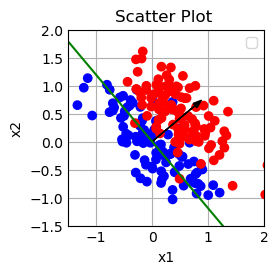

In [456]:
import matplotlib.pyplot as plt


# Assuming you have already defined x1, x2, and y as NumPy arrays.
colors = ['red' if y_val == 1 else 'blue' for y_val in y]

plt.scatter(x1, x2, c=colors)
# Set the x-axis and y-axis limits
plt.xlim(-1.5, 2)
plt.ylim(-1.5, 2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot ')
plt.arrow(0, 0, w_best[0], w_best[1], head_width=0.1, color='black')
plt.axline((0, 0), (db_vector[0], db_vector[1]),  color='green')


plt.grid(True)
plt.legend()
plt.show()

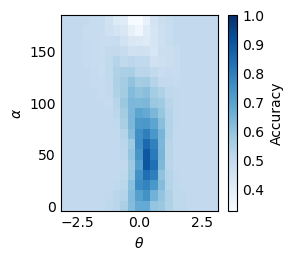

In [433]:
plt.pcolor(bais_opt, angles, acc_mat, vmax=1)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\alpha$')
plt.colorbar(label='Accuracy')